## MSDS 432 - Programming Assignment #2 Dan Avni

## Executive Summary

The purpose of this programming assignment is to 

## Method and Conclusions

In order to 
<img src="./runtime.png">

## Implementation

In [8]:
#import required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import string
import random

In [39]:
# selection sort implemntation retrieved from:
# https://github.com/egonSchiele/grokking_algorithms/blob/master/02_selection_sort/python/01_selection_sort.py

# Finds the smallest value in an array
def findSmallest(arr):
  # Stores the smallest value
  smallest = arr[0]
  # Stores the index of the smallest value
  smallest_index = 0
  for i in range(1, len(arr)):
    if arr[i] < smallest:
      smallest_index = i
      smallest = arr[i]      
  return smallest_index

# Sort array
def selectionSort(arr):
  newArr = []
  for i in range(len(arr)):
      # Finds the smallest element in the array and adds it to the new array
      smallest = findSmallest(arr)
      newArr.append(arr.pop(smallest))
  return newArr

In [3]:
#unit test validation of the selection sort implementation
print(selectionSort([5, 3, 6, 2, 10]))
print(selectionSort(['a', 'za', 'c', 'zz', '0']))

[2, 3, 5, 6, 10]
['0', 'a', 'c', 'za', 'zz']


In [22]:
#utility function to generate and array of uniformly distributed data array with persistent seed across calls 
def generate_random_array(data_type, item_count, low=0, high=10000):
    np.random.seed(666)
    
    if data_type == 'integer':
        return np.random.randint(low, high, item_count).tolist()
    if data_type == 'str5':
        return  [''.join(random.choices(string.ascii_letters, k = 5)) for _ in range(item_count)]
    if data_type == 'str15':
        return  [''.join(random.choices(string.ascii_letters, k = 15)) for _ in range(item_count)]
    if data_type == 'decimal':
        return  np.random.uniform(-1, 0, item_count).tolist()
        
    return None

In [35]:
#prepare an array of all the desired data lengths
test_data_len_list  = [5000, 10000, 15000, 20000, 25000]
test_data_types     = ['integer', 'decimal', 'str5', 'str15']

#prepare an empty data frame with the desired column names
test_data_col_names = ['length', 'data_type', 'sort_ms']
test_data           = pd.DataFrame(columns = test_data_col_names) 

In [36]:
#iterate over the possible lens, create test data for each length, and compture runtime length in milliseconds
for test_data_len in test_data_len_list:
    for test_data_type in test_data_types:
        data = generate_random_array(test_data_type, test_data_len)
    
        start   = time.time()
        data    = selectionSort(data)
        sort_ms = (time.time() - start) * 1000

        #insert the results into a new dataframe record 
        test_data.loc[len(test_data)] = [test_data_len, test_data_type, sort_ms]

Below is a tabular representation of the test data. It is useful as the charts fail to show the minute fluctuations in the binary search performance. To get a true read of the binary search performance we will need to run multiple tests and average the results, as well as increase the size. We should also try to execute the code in a virtualized environment where the CPU is under competition from other processes.

In [37]:
#plain text data dump of the test results
test_data

,length,data_type,sort_ms
0,5000,integer,756.828308
1,5000,decimal,764.099836
2,5000,str5,1109.724283
3,5000,str15,1236.944199
4,10000,integer,3750.569820
5,10000,decimal,3787.078381
6,10000,str5,4579.800606
7,10000,str15,4885.007381
8,15000,integer,8583.329201
9,15000,decimal,11517.954826


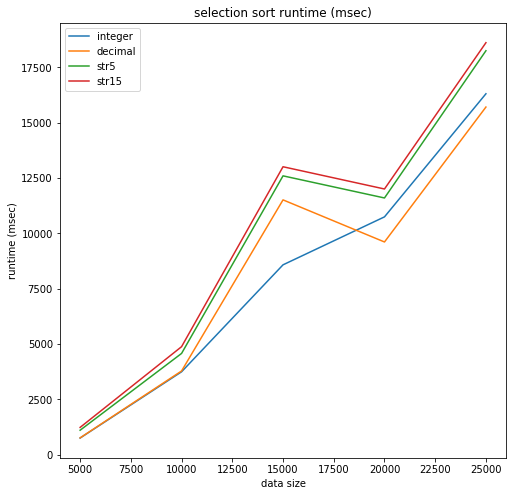

In [38]:
#plot the binary and linear search results against the data length
plt.figure(figsize=(8,8))

for test_data_type in test_data_types:
    plt.plot(
        test_data[test_data.data_type==test_data_type].length, 
        test_data[test_data.data_type==test_data_type].sort_ms, label = test_data_type)

plt.legend()
plt.xlabel('data size')
plt.ylabel('runtime (msec)')
plt.title('selection sort runtime (msec)')
plt.show()